# Intro to Jupyter & Kickstarter data exploration 

XP:
- jupyter notebook nuggets
- pandas dataframe starter pack
- plot some pretty graphs

Main "inspiration" credits to: https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/ and King's awesome tech data scientist Juan González-Vallinas.

Kickstarter data: https://www.kaggle.com/socathie/kickstarter-project-statistics

Plotting "inspiration": https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

If not installed, try it here: https://try.jupyter.org/

*Any follow-up questions/suggestions on improvements, feel free to contact me (Sam): contradirony@gmail.com


------------------------
## 1. Jupyter notebook nuggets: how to use Jupyter - efficiently!

### Still useful reference

Easy reference:

**General**

Enter: enter edit mode

Shift-Enter: run cell, select below

Ctrl-Enter: run cell

Alt-Enter: run cell, insert below

**Command Mode (press Esc to enable)**

A/B: insert cell above/below

**Edit Mode (press Enter to enable)**

Tab: code completion or indent

Ctrl-Shift-Subtract: split cell


----------------------------------
## 2a. pandas dataframe starter pack

Pandas is a high level data analysis package. This means that Pandas tries to be the only library you need for data. It has three main functions:

1. Reading and Writing data
2. Manipulating data
3. Plotting data

It is *desirable* also that you get acquainted with the main libraries behind the pandas 3 functions:

1. Reading and Writing: [SQLAlchemy](http://www.sqlalchemy.org/library.html#tutorials)
2. Crunching: [Numpy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html), [numexpr](https://github.com/pydata/numexpr/wiki/Numexpr-Users-Guide)
3. Plotting: [matplotlib](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

Links above are for some tutorials. Check them out later if you want to learn more in detail how to do these things or if you want to understand what Pandas does under the hood. Note that in order to be proficient using Pandas, you **need** to be have a good *foundation* in:

- Basic python collections: `list`, `dict`, a bit of list comprehensions and basic control flows (`for` and `if`). This [tutorial](https://docs.python.org/3/tutorial/datastructures.html) contains all this and more.
- Python built-in functions. The ones I use the most are `len`, `range`, `enumerate`, `type`, type casting (`int`, `str`, `float`...) and `enumerate`. Full list [here](https://docs.python.org/3/library/functions.html)
- Python functional programming with `lambda`
- Understanding of `numpy.array`


**<span style="color:blue">However, no need to fear - this tutorial will give you the experience to get motivated!</span>**
### Import and basic manipulation

In [1]:
import pandas as pd
import numpy as np

Most fundamental concept is the dataframe, let's create some

In [2]:
my_list = [["a",20,30,40], [10,20,"n",40]]
my_list

[['a', 20, 30, 40], [10, 20, 'n', 40]]

In [3]:
pd.DataFrame(my_list)

,0,1,2,3
0,a,20,30,40
1,10,20,n,40


In [4]:
my_df=pd.DataFrame({"a":np.random.normal(size=10), "b": np.random.normal(size=10)})
my_df

,a,b
0,0.182417,-2.942499
1,-0.358456,1.765524
2,-2.226781,2.956730
3,0.881336,-0.849664
4,0.997367,0.960422
5,1.056445,0.254378
6,0.555815,-0.608434
7,0.967010,-0.973461
8,1.597489,-0.061775
9,1.282431,1.406903


In [5]:
type(my_df)

pandas.core.frame.DataFrame

Writing and Reading dataframes

In [6]:
# Write our glorious df
my_df.to_csv("datasets/pandas_tutorial.csv") 
# my_df.to_excel("pandas_tutorial.xls")
my_df.to_json("datasets/pandas_tutorial.json")

In [7]:
# read it back
df_from_csv = pd.read_csv("datasets/pandas_tutorial.csv") 
# df_from_excel = pd.read_excel("pandas_tutorial.xls") #eww...
df_from_json = pd.read_json("datasets/pandas_tutorial.json") 

In [8]:
df_from_json.head()

,a,b
0,0.182417,-2.942499
1,-0.358456,1.765524
2,-2.226781,2.956730
3,0.881336,-0.849664
4,0.997367,0.960422


### <span style="color:red">Help?</span>

In [9]:
# execute me!
my_df.head?

In [10]:
# with 2 question marks, you get to see the code
my_df.head??

### Real Data Time

In [11]:
ksdata= pd.read_csv('datasets/most_backed_kickstarter.csv', index_col=0) # index_col=0 is to not include row number

In [12]:
ksdata.shape

(4000, 12)

In [13]:
ksdata.head(3)

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...


### Basic slicing

In [14]:
ksdata[12:16]

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
12,3845170,"\nClassic Japanese side-scrolling action, evol...","comcept USA, LLC",Video Games,usd,900000,"Tokyo, Japan",67226,"[2438, 34059, 6445, 7289, 4472, 1716, 3593, 22...","[5.0, 20.0, 40.0, 60.0, 60.0, 80.0, 99.0, 120....",Mighty No. 9,/projects/mightyno9/mighty-no-9
13,12779843,"\nTwo affordable, heart rate-enabled smartwatc...",Pebble Technology,Product Design,usd,1000000,"Redwood City, CA",66673,"[5000, 2798, 8546, 234, 679, 9996, 2042, 13446...","[69.0, 79.0, 99.0, 109.0, 149.0, 169.0, 169.0,...","Pebble 2, Time 2 + All-New Pebble Core",/projects/597507018/pebble-2-time-2-and-core-a...
14,5545991,"\nIGAVANIA (n): A gothic, exploration-focused ...",Koji Igarashi,Video Games,usd,500000,"Tokyo, Japan",64867,"[913, 20155, 16450, 6569, 8799, 3085, 2920, 14...","[5.0, 28.0, 60.0, 60.0, 100.0, 125.0, 150.0, 1...",Bloodstained: Ritual of the Night,/projects/iga/bloodstained-ritual-of-the-night
15,3246588,\nFrom the creators of Cyanide & Happiness com...,Cyanide And Happiness,Tabletop Games,usd,10000,"Dallas, TX",63758,"[435, 6491, 26903, 18140, 7395, 1841, 1279, 1,...","[1.0, 25.0, 35.0, 45.0, 60.0, 75.0, 100.0, 102...",Joking Hazard,/projects/cyanideandhappiness/joking-hazard


In [15]:
ksdata["category"].head()

0    Tabletop Games
1    Product Design
2               Web
3    Narrative Film
4       Video Games
Name: category, dtype: object

In [16]:
type(ksdata["category"])

pandas.core.series.Series

You can pass multiple rows on a list as a key, and you get a `pd.DataFrame` back

In [17]:
my_keys = ["category", "goal"]
ksdata[my_keys].head()

,category,goal
0,Tabletop Games,10000
1,Product Design,15000
2,Web,1000000
3,Narrative Film,2000000
4,Video Games,400000


Which can be compacted as:

In [18]:
ksdata[["category", "goal"]].head()

,category,goal
0,Tabletop Games,10000
1,Product Design,15000
2,Web,1000000
3,Narrative Film,2000000
4,Video Games,400000


The difference?

In [19]:
type(ksdata["category"].head())

pandas.core.series.Series

In [20]:
type(ksdata[["category"]].head())

pandas.core.frame.DataFrame

Mainly that `[]` can only take one column name and converts it into a series, whereas `[[]]` can take multiple columns and the type remains a dataframe.
`pd.DataFrame` is prettier than `pd.Series` in notebooks. Many functions overlap, but are not exactly the same.

### Let's Start Exploring

In [21]:
ksdata.keys()
ksdata.head()

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [22]:
ksdata['blurb'][9]

'\nZNAPS is a magnetic adapter\xa0specially designed\xa0to\xa0\xa0seamlessly fit your\xa0mobile devices and cables, so you can charge and sync with the peace of mind that your devices are safe and protected.\n'

For numeric columns

In [23]:
ksdata.describe()

,amt.pledged,goal,num.backers
count,4000.000000,4000.000000,4000.000000
mean,289992.319250,61752.034250,3582.875750
std,711936.917539,126671.475596,7316.102809
min,1925.000000,1.000000,1109.000000
25%,67713.000000,13000.000000,1406.750000
50%,120586.000000,30000.000000,1946.000000
75%,259368.000000,60000.000000,3372.000000
max,20338986.000000,2000000.000000,219382.000000


### Group by

Lets assume that we want to obtain the total for each category

In [25]:
ksdata.groupby("category").sum()

,amt.pledged,goal,num.backers
category,,,
3D Printing,17087619,1425999,78065
Academic,91474,75000,1461
Accessories,3151421,499200,61951
Action,630019,200000,17713
Animation,11349738,6369000,178891
Anthologies,2304845,769200,46028
Apparel,10387585,1097400,85561
Apps,1382373,393858,44019
Architecture,1034504,424000,7150


What if what we want is the mean?

In [26]:
ksdata.groupby("category").mean()

,amt.pledged,goal,num.backers
category,,,
3D Printing,742939.956522,61999.956522,3394.130435
Academic,91474.000000,75000.000000,1461.000000
Accessories,157571.050000,24960.000000,3097.550000
Action,630019.000000,200000.000000,17713.000000
Animation,231627.306122,129979.591837,3650.836735
Anthologies,100210.652174,33443.478261,2001.217391
Apparel,324612.031250,34293.750000,2673.781250
Apps,81316.058824,23168.117647,2589.352941
Architecture,517252.000000,212000.000000,3575.000000


Finally, you can add your own aggregating functions with the `agg()` function to a groupby object and apply them all at the same time.

In [27]:
ksdata[["amt.pledged", "num.backers", "category"]].groupby("category").agg([np.sum, np.mean, len])

amt.pledged                      num.backers                \
                           sum            mean  len         sum          mean   
category                                                                        
3D Printing           17087619   742939.956522   23       78065   3394.130435   
Academic                 91474    91474.000000    1        1461   1461.000000   
Accessories            3151421   157571.050000   20       61951   3097.550000   
Action                  630019   630019.000000    1       17713  17713.000000   
Animation             11349738   231627.306122   49      178891   3650.836735   
Anthologies            2304845   100210.652174   23       46028   2001.217391   
Apparel               10387585   324612.031250   32       85561   2673.781250   
Apps                   1382373    81316.058824   17       44019   2589.352941   
Architecture           1034504   517252.000000    2        7150   3575.000000   
Art                    5442301   362820.066667   15       41799   2786.600000   
Art Books              4737943   139351.264706   34       71773   2110.970588   
Audio                   193742    96871.000000    2        3145   1572.500000   
Calendars               117328    58664.000000    2        2285   1142.500000   
Camera Equipment      10749860   413456.153846   26       59803   2300.115385   
Children's Books       2505071   131845.842105   19       58688   3088.842105   
Childrenswear           285755   142877.500000    2        4635   2317.500000   
Chiptune                455229   151743.000000    3       12562   4187.333333   
Civic Design            805015   161003.000000    5       10407   2081.400000   
Classical Music         422043   105510.750000    4        9298   2324.500000   
Comedy                 2816273   187751.533333   15       54428   3628.533333   
Comic Books             914819    91481.900000   10       16186   1618.600000   
Comics                11122271   140788.240506   79      211310   2674.810127   
Conceptual Art          115324    57662.000000    2        2782   1391.000000   
Cookbooks               540540    77220.000000    7       16047   2292.428571   
Country &amp; Folk      340644   113548.000000    3        5027   1675.666667   
Crafts                 1017647   145378.142857    7       22498   3214.000000   
DIY Electronics       10922092   260049.809524   42      139711   3326.452381   
Dance                   146075   146075.000000    1        4133   4133.000000   
Design                20655212   208638.505051   99      279935   2827.626263   
Digital Art             116766    58383.000000    2        2766   1383.000000   
...                        ...             ...  ...         ...           ...   
Ready-to-wear           425452   141817.333333    3        6157   2052.333333   
Restaurants             903036   225759.000000    4        7521   1880.250000   
Robots                 6256198   347566.555556   18       42547   2363.722222   
Rock                   1466133   122177.750000   12       31859   2654.916667   
Romance                 121084   121084.000000    1        1334   1334.000000   
Science Fiction        1417423   283484.600000    5       18587   3717.400000   
Sculpture              2162013   540503.250000    4        7138   1784.500000   
Shorts                  781843    97730.375000    8       14138   1767.250000   
Small Batch             533166   133291.500000    4       11271   2817.750000   
Software               2467499    91388.851852   27       68554   2539.037037   
Sound                 20168046   775694.076923   26      105782   4068.538462   
Space Exploration      4777354   477735.400000   10       69478   6947.800000   
Spaces                  309864   154932.000000    2        3025   1512.500000   
Stationery               47165    47165.000000    1        1326   1326.000000   
Tabletop Games       204123729   275099.365229  742     2460853   3316.513477   
Technology            64281911   422907.309211  15

### Filtering out data with maskers and query

Lets assume that we only care about goals that are more than 300K dollars (small deviation on syntax)

In [28]:
goal1 = ksdata.goal > 300000

In [29]:
goal2 = ksdata['goal'] > 300000

In [30]:
type(goal1)

pandas.core.series.Series

In [32]:
goal1==goal2

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
3970    True
3971    True
3972    True
3973    True
3974    True
3975    True
3976    True
3977    True
3978    True
3979    True
3980    True
3981    True
3982    True
3983    True
3984    True
3985    True
3986    True
3987    True
3988    True
3989    True
3990    True
3991    True
3992    True
3993    True
3994    True
3995    True
3996    True
3997    True
3998    True
3999    True
Name: goal, dtype: bool

Because we know the type is a series, we can use a <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.equals.html">pandas series comparison</a>

In [33]:
goal1.equals(goal2) 

True

What if we have more than one criteria? E.g. goal >1M and currency is in USD

In [34]:
comb_goal = np.all([ksdata.goal > 1000000, ksdata.currency == 'usd'], axis=0)
comb_goal

array([False, False, False, ..., False, False, False], dtype=bool)

In [35]:
ksdata_goal = ksdata[comb_goal]
ksdata_goal.shape

(10, 12)

Sanity check

In [36]:
ksdata_goal.shape

(10, 12)

In [37]:
ksdata_goal['currency'].value_counts().head(10)

usd    10
Name: currency, dtype: int64

In [38]:
ksdata_goal['goal'].value_counts()

2000000    5
1100000    2
1250000    2
1500000    1
Name: goal, dtype: int64

Finally, let's see what are the top 10 Kickstarter project categories

In [39]:
ksdata['category'].value_counts().head(10)

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

In [40]:
pd.value_counts?

In [42]:
ksdata['category'].value_counts().head(10)

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

In [41]:
ksdata['category'].value_counts().tail(10)

Television           1
Faith                1
Jewelry              1
Fabrication Tools    1
Movie Theaters       1
Drama                1
Jazz                 1
Video                1
Academic             1
Music Videos         1
Name: category, dtype: int64

## 2b. plot some pretty graphs

In [43]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# need the following to show output of matplotlib plots
%matplotlib inline

The first way we can plot things is using the .plot extension from Pandas dataframes

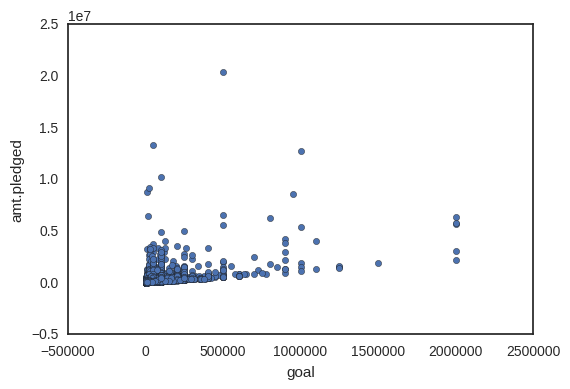

In [44]:
ksdata.plot(kind="scatter", x="goal", y="amt.pledged")

 We can also use the seaborn library to make a similar plot
 
 A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure


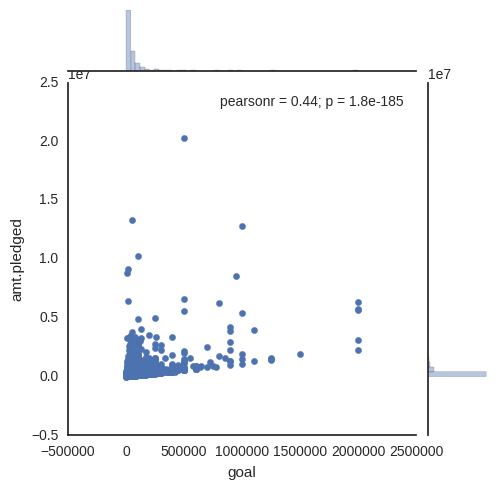

In [49]:
sns.jointplot(x="goal", y="amt.pledged", data=ksdata, size=5)

One piece of information missing in the plots above is what category each campaign is. We'll use seaborn's FacetGrid to color the scatterplot by category

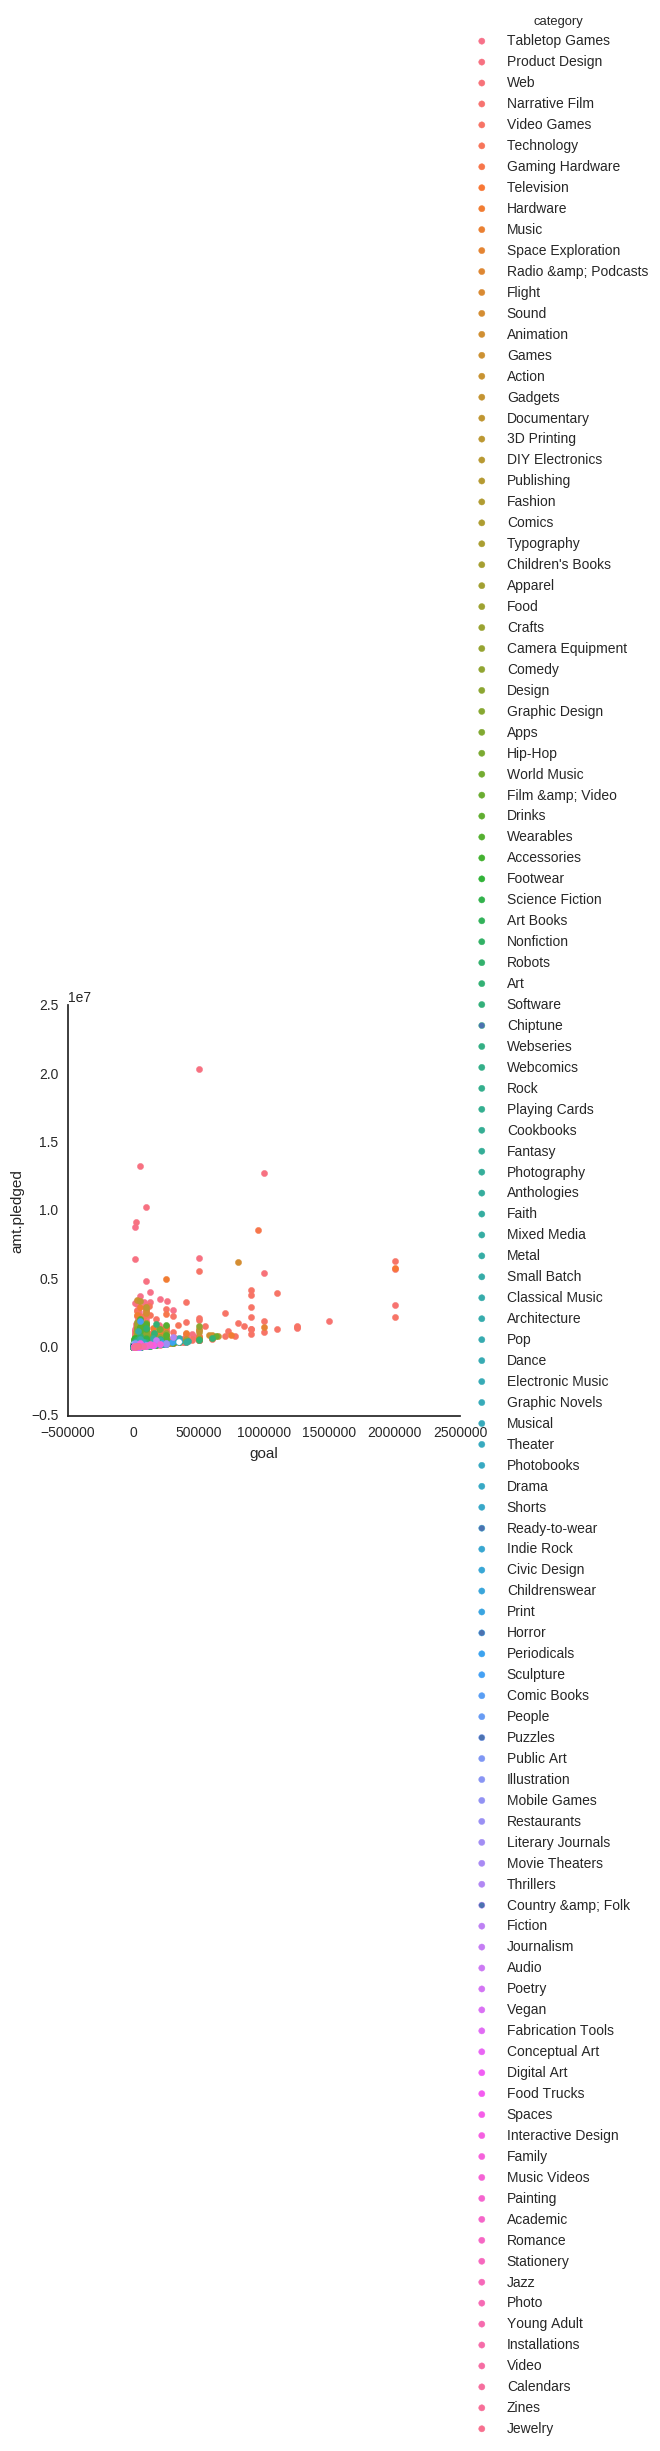

In [50]:
sns.FacetGrid(ksdata, hue="category", size=5).map(plt.scatter, "goal", "amt.pledged").add_legend()

### This is a bit overkill and difficult to make sense of - let's plot for top 5 and call the rest 'Other'

First, get the top 5 highest categories

In [51]:
ksdata['category'].value_counts().head()

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Name: category, dtype: int64

Get their names only

In [52]:
top5categories = list(ksdata['category'].value_counts().head().keys())
top5categories

['Product Design', 'Tabletop Games', 'Video Games', 'Hardware', 'Technology']

Remember, ksdata['category'] is column that contains all categories in original dataframe

Now get result of seeing if the categories in the dataframe are in the top 5 defined ones

In [53]:
ksdata['category'].isin(top5categories).head()

0     True
1     True
2    False
3    False
4     True
Name: category, dtype: bool

Define new column category.short that keeps the category name if it is in the top 5, but if not is marked as 'Other'

In [54]:
ksdata['category.short']=np.where(ksdata['category'].isin(top5categories), ksdata['category'], 'Other')

Check that it worked!

In [55]:
ksdata[['category','category.short']].head()

,category,category.short
0,Tabletop Games,Tabletop Games
1,Product Design,Product Design
2,Web,Other
3,Narrative Film,Other
4,Video Games,Video Games


Finally, let's try again with category.short instead of category

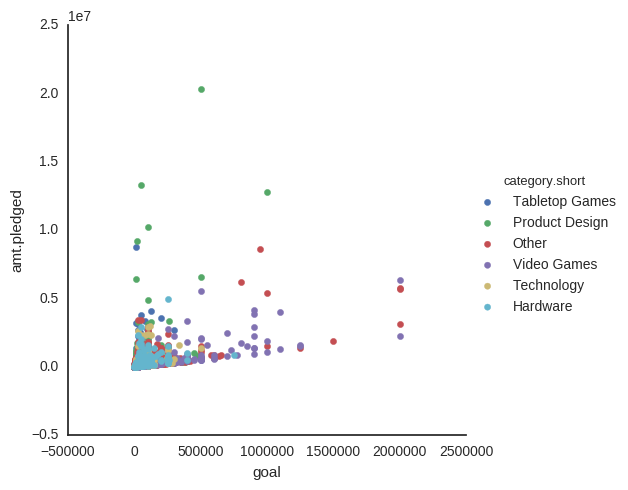

In [56]:
sns.FacetGrid(ksdata, hue="category.short", size=5) \
   .map(plt.scatter, "goal", "amt.pledged") \
   .add_legend()

Let's change colour - <a href="http://matplotlib.org/users/colormaps.html">full list of palette sets</a>

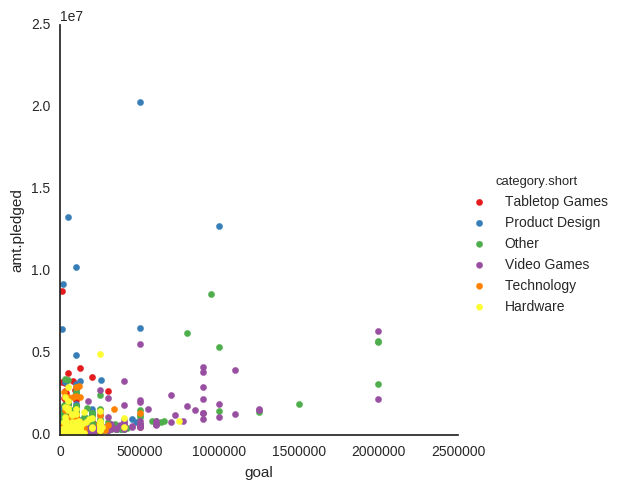

In [57]:
sns.FacetGrid(ksdata, hue="category.short", palette="Set1", size=5) \
   .map(plt.scatter, "goal", "amt.pledged") \
   .add_legend().set(xlim=(0, None)).set(ylim=(0, None))

Main insights: Video games looks like they tend to overestimate goal, whereas Product Design is more conservative.

Nice follow-up analysis - WHY? But that's for another day :)

### Is this the end?

Don't forget to <br>
jupyter nbconvert --to html 2016-12-03-SL-Intro_To_Jupyter_Part2_Data_and_Graphs.ipynb

-------------------------------------
## If you want to know more
- Where it's all about: https://jupyter.org/
- A github with more formal set of tutorials: https://github.com/gte620v/PythonTutorialWithJupyter
- A gallery of interesting Notebooks: http://nb.bianp.net/sort/views/
- More kaggle datasets, many with notebooks: https://www.kaggle.com/kernels
-------------------------------------